### Importation des packages

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
import os
from os import path
#from PIL import Image

### Exemple de lecture d'une image

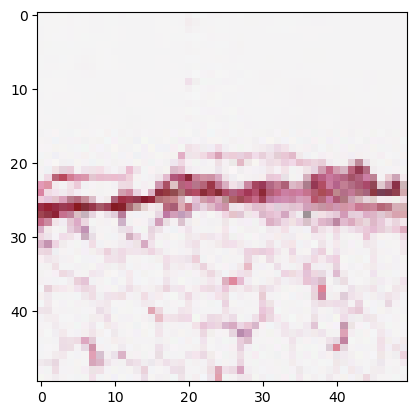

In [2]:
filename = r'./13666_idx5_x101_y801_class0.png'
img = io.imread(filename)
plt.imshow(img)

On remarque que le nom de l'image "13666_idx5_x101_y801_class0" est composé de :

13666 le numero de la personne effectuant l'irm

x101 les coordonnées en x de l'endroit où ce patch a été recadré

y801 les coordonnées en y de l'endroit où ce patch a été recadré

class0 ou class1 avec classi signifie que l'image représente une irm qui indique la présence du cancer ou pas si i=0 le sein est saint, non si i=1


### 

### Data exploration

### Exploration de la structure des données 
calcul du nombre de patient

In [3]:
base_path = "./Breast_Histopathology_images/"
folder = listdir(base_path)
len(folder)

5

On a utilisé uniquement 5 pour des raisons de rapidité d'execution 

In [4]:
folder[0:10]

['10253', '10254', '10255', '10256', '10257']

# Fonction pour compter le nombre total d'image

In [5]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id 
        class_path = patient_path + "/" + str(c) + "/"
        if (os.path.exists(class_path)) :
            subfiles = listdir(class_path)
            total_images += len(subfiles)

In [6]:
total_images

2772

### Creation d'un premier dataframe data
os.path -> si le repertoir existe je liste toutes les images et s'il n'existe pas ça veut dire qu'il ne contient pas d'image, je passe

In [7]:
from skimage.io import imread
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])


k = 0
for n in range(len(folder)):
    patient_id = folder[n] # on recupére tel patient
    patient_path = base_path + patient_id # et on lui défini son chemin d'accées 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/" # le chemin pour acceder un classe 0 ou 1 
        if (os.path.exists(class_path)) : # si le chemin de la classe 0 ou 1 existe 
            subfiles = listdir(class_path) # liste de tous les fichier et dossiers existant dans Classpath donc les images 
            for m in range(len(subfiles)):
                image_path = subfiles[m] # le chemain des images dans lesquelles je souhaite travailler 
                data.iloc[k]["path"] = class_path + image_path
                # *** data.iloc[k]["path"] = imread(class_path + image_path).flatten() *** 
                data.iloc[k]["target"] = c
                data.iloc[k]["patient_id"] = patient_id
                k += 1

data.head()

patient_id                                               path target
0      10253  ./Breast_Histopathology_images/10253/0/10253_i...      0
1      10253  ./Breast_Histopathology_images/10253/0/10253_i...      0
2      10253  ./Breast_Histopathology_images/10253/0/10253_i...      0
3      10253  ./Breast_Histopathology_images/10253/0/10253_i...      0
4      10253  ./Breast_Histopathology_images/10253/0/10253_i...      0

On a converti nos images en dataframe pour pouvoir les traiter 

### La dimmension du dataFrame

In [8]:
data.shape


(2772, 3)

In [9]:
 pip install mlflow

     ---------------------------------------- 16.7/16.7 MB 2.1 MB/s eta 0:00:00
  Using cached alembic-1.9.1-py3-none-any.whl (210 kB)
  Using cached pyarrow-10.0.1-cp39-cp39-win_amd64.whl (20.3 MB)
     -------------------------------------- 184.0/184.0 kB 1.8 MB/s eta 0:00:00
  Using cached docker-6.0.1-py3-none-any.whl (147 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached databricks_cli-0.17.4-py3-none-any.whl
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached pywin32-305-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\hadja\\anaconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



### Separation de patch sains et cancereuses

In [10]:
data.target = data.target.astype(np.int)

C:\Users\hadja\AppData\Local\Temp\ipykernel_10868\1823890891.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.target = data.target.astype(np.int)


### Les images avec taches de cancer

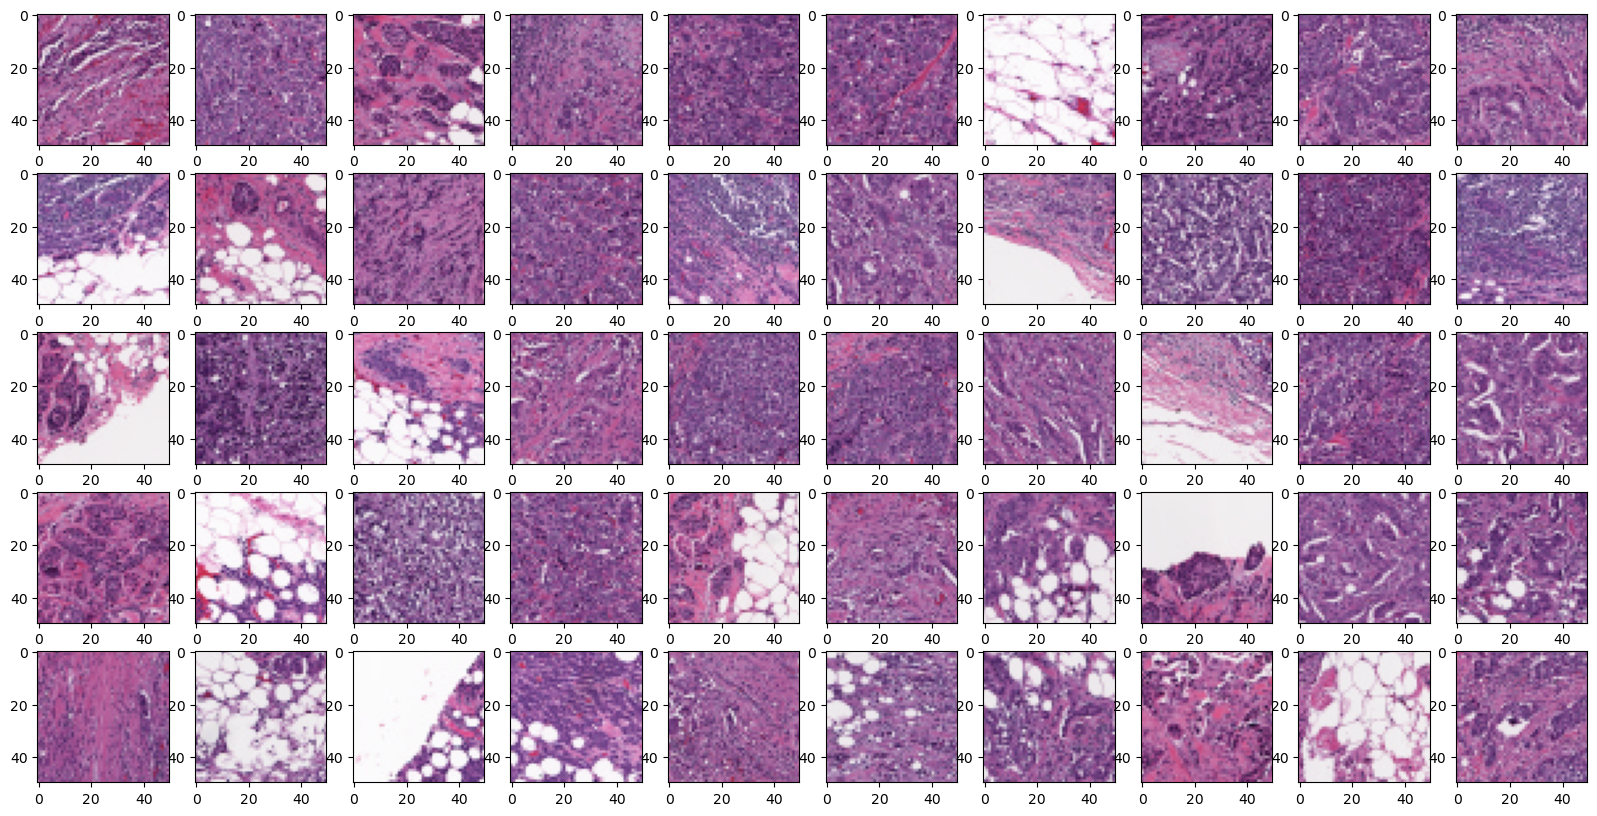

In [9]:
pos_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False) # génération d'un echantillon de données quand target=1 (cas cancéreux)
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        image = io.imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

### Les images sans taches de cancer

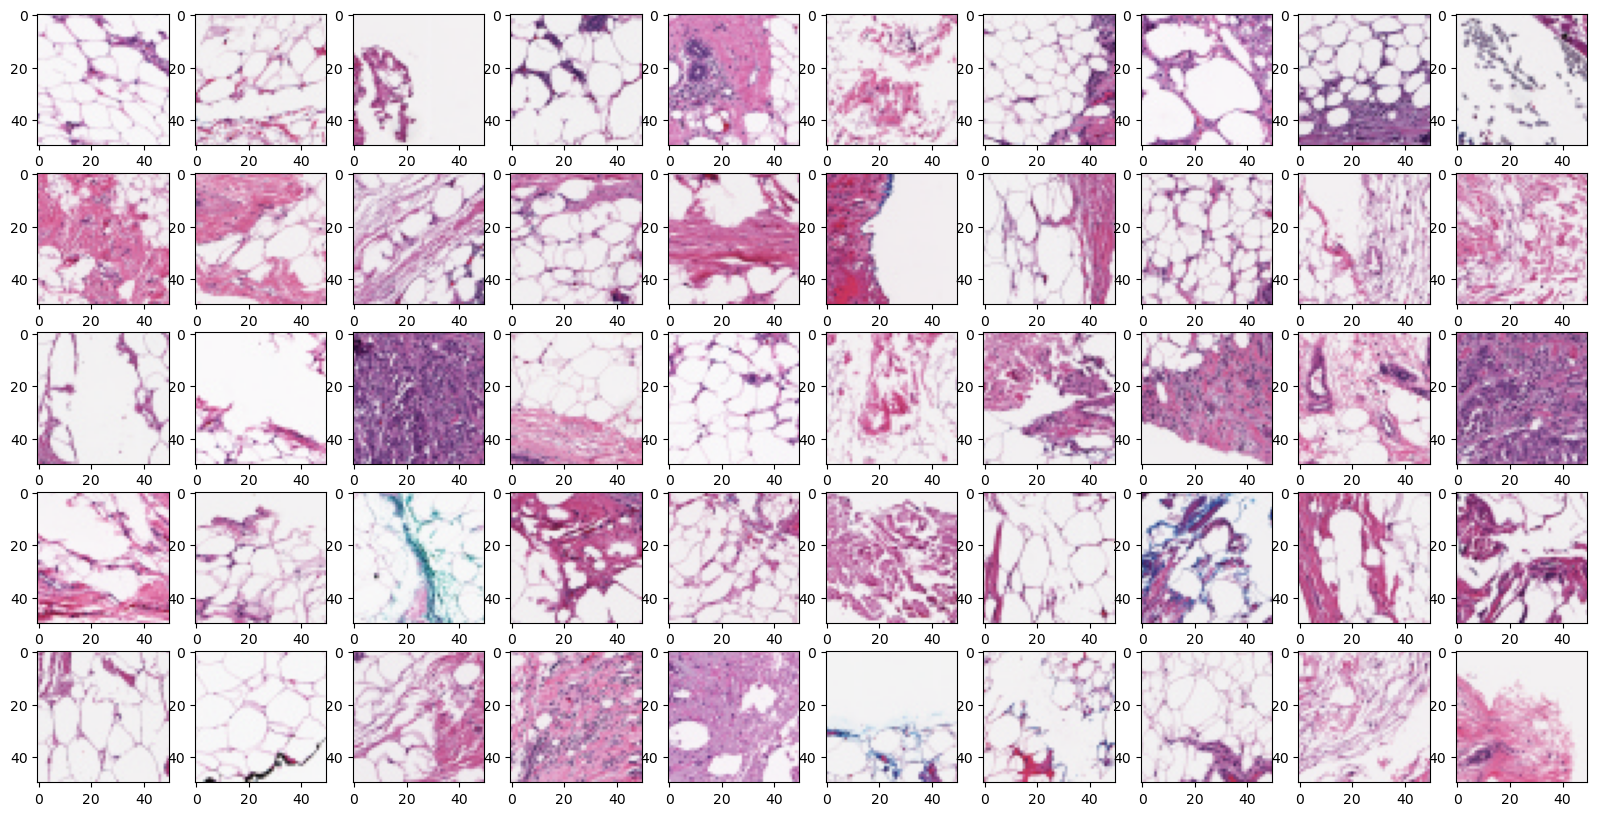

In [10]:
neg_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False) # génération d'un echantillon de données quand target=0 (cas non cancéreux)
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        image = io.imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

### Explications
Les patchs cancéreux sont plus violets et plus denses que les patchs sains. Est-ce vraiment typique du cancer ou plutôt des cellules et tissus canalaires ?
Bien que certaines taches saines soient également de couleur violette !
Il serait très intéressant de savoir quels sont les critères importants pour un pathologiste.
Je suppose que les trous dans le tissu appartiennent aux canaux mammaires par lesquels le lait peut s'écouler.

### Data preprocessing

### Verification de la resolution 

Verifier si toutes les images ont la même resolution(50*50)
Rementionner les images qui ne respect pas cette fonction

In [12]:
#for i in range(data):
#img=Image.open(data);
#imge=img.size;
#print(imge)

# for path in data['path'] :
#     im = Image.open(path)
#     width, height = im.size
#     print(width, height)

In [13]:
data.shape

(2772, 3)

### Creation du nouveau dataframe df avec patient_id, feature et target comme colonne

In [14]:
#my own test
import cv2
np.set_printoptions(threshold=np.inf)
df = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "feature", "target"])


k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        if (os.path.exists(class_path)) :
            subfiles = listdir(class_path)
            for m in range(len(subfiles)):
                image_path = subfiles[m]
                df.iloc[k]["feature"] = cv2.imread(class_path + image_path) # à ce niveau le contenu sera un tableau de 3 dimensions puisque l'image chargée est une image colorée
                df.iloc[k]["target"] = c
                df.iloc[k]["patient_id"] = patient_id
                k += 1
                
df.head()

patient_id                                            feature target
0      10253  [[[206, 164, 226], [196, 154, 224], [211, 175,...      0
1      10253  [[[197, 150, 219], [201, 158, 217], [205, 173,...      0
2      10253  [[[249, 245, 248], [248, 246, 248], [253, 246,...      0
3      10253  [[[249, 247, 249], [249, 247, 249], [249, 247,...      0
4      10253  [[[237, 231, 241], [245, 242, 246], [235, 222,...      0

La génération des features à partir du tableau qui contient des données au niveau du pixel calculé avec cv2.imread

In [15]:
df.iloc[0].feature.ndim # la dimention de nos features pour chaque image est de 3 

3

### Creation de deux tableaux x et y qui vont contenir les features et targets 

In [16]:
import cv2
classes = [0, 1]
x = []
y = []
for cls in classes :
    pth = class_path = patient_path + "/" + str(c) + "/"
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0) # on a choisis le flag 0 (image en noir et blanc) pour ne pas confondre les nuances de rose à la visualisation des irm
        img = cv2.resize(img,(50,50)) # une forme fixe de nos images
        x.append(img)
        y.append(classes[cls])


In [17]:
x = []
y = []
for i, row in df.iterrows():
    x.append(row['feature'])
    y.append(row['target'])

In [18]:
np.unique(y)

array([0, 1])

In [19]:
print(np.set_printoptions(threshold=np.inf)) # on souhaite se rassurer de la façon dont les les tableaux et objets NumPy sont affichés
x[0]

None


array([[[206, 164, 226],
        [196, 154, 224],
        [211, 175, 225],
        [210, 174, 225],
        [199, 159, 229],
        [203, 162, 230],
        [189, 147, 223],
        [194, 152, 224],
        [208, 174, 230],
        [191, 144, 215],
        [170, 110, 205],
        [172, 118, 215],
        [158,  99, 206],
        [172, 112, 213],
        [175, 125, 221],
        [186, 136, 220],
        [188, 141, 224],
        [180, 130, 218],
        [172, 116, 219],
        [163, 109, 216],
        [170, 115, 214],
        [171, 121, 216],
        [169, 120, 221],
        [173, 119, 214],
        [168, 109, 203],
        [180, 126, 199],
        [191, 145, 222],
        [155, 103, 176],
        [202, 167, 224],
        [227, 205, 241],
        [238, 225, 240],
        [233, 224, 241],
        [240, 237, 246],
        [250, 244, 249],
        [249, 248, 247],
        [246, 242, 249],
        [249, 246, 247],
        [246, 244, 249],
        [239, 228, 242],
        [218, 195, 232],


Modification des types de features 

In [20]:
df.astype({'patient_id': int})
df['feature'] = df['feature'].apply(np.array) 

In [21]:
df['patient_id'].astype(int)
df['feature'] = df['feature'].apply(np.array)


In [22]:
x = np.array(x)
y = np.array(y)

In [23]:
pd.Series(y).value_counts()

0    2210
1     562
dtype: int64

In [24]:
x.shape

(2772, 50, 50, 3)

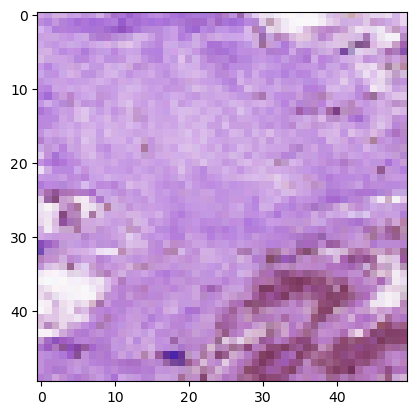

In [25]:
plt.imshow(x[0],cmap = 'gray') # le cmap n'a aucun sens puisque notre image est en couleur il est mis juste pour qu'on comprenne sa signification

Mise à jour de x

In [26]:
x_updated = x.reshape(len(x), -1)
x_updated.shape

(2772, 7500)

### Data Science 

#### Split data

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_updated, y, test_size=0.2, shuffle=True)

In [28]:
x_train.shape, x_test.shape

((2217, 7500), (555, 7500))

Remise à bonne echelle les features 

In [29]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 2
255 1
1.0 0.00784313725490196
1.0 0.00392156862745098



Outil de selection des features pour entrainer les modéles : PCA

In [30]:
from sklearn.decomposition import PCA
print(x_train.shape, x_test.shape)
pca = PCA(.98) # l'algorithme trouvera les composantes principales qui expliquent 98 % de la variance des données
pca_train = x_train
pca_test = x_test

(2217, 7500) (555, 7500)


# Regression Logistique

In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, y_train)

LogisticRegression(C=0.1)

Evaluation des résultats 1

In [33]:
print("Training Score:", lg.score(pca_train, y_train))
print("Testing Score:", lg.score(pca_test, y_test))


Training Score: 0.984212900315742
Testing Score: 0.8954954954954955


La prediction 

In [34]:
pred = lg.predict(pca_test)
np.where(y_test!=pred)

(array([ 23,  29,  30,  33,  49,  66,  78,  97, 103, 104, 110, 112, 113,
        127, 132, 152, 162, 163, 173, 178, 181, 185, 189, 239, 256, 257,
        277, 283, 287, 317, 319, 324, 328, 331, 335, 338, 342, 345, 346,
        347, 361, 362, 368, 390, 392, 393, 421, 427, 458, 467, 480, 523,
        525, 526, 539, 540, 546, 549], dtype=int64),)

In [35]:
pred[6]

0

In [36]:
y_test[6]

0

# SVM : Support Vector Machine

Accuracy:  92.61261261261261 %


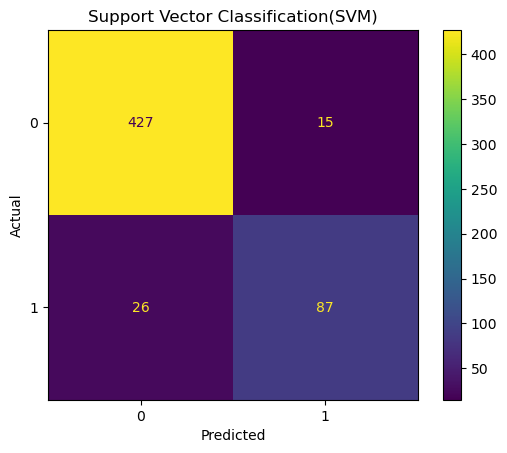

In [38]:
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

clf=SVC()
clf.fit(pca_train,y_train) # entrainement des donneés
y_pred = clf.predict(pca_test) # on applique la prediction sur les test_data
# creation de la matrice de confusion
plot_confusion_matrix(clf,pca_test,y_test)
matrix = confusion_matrix(y_test,y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Classification(SVM)")

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

On remarque de cette matrice de confusion qu'on a trés haut taux de faux negatifs, ce qui explique que le modéle à bien fonctionné 

# Arbre de décision 

['IDC(-)', 'IDC(+)']
Accuracy:  85.76576576576576 %


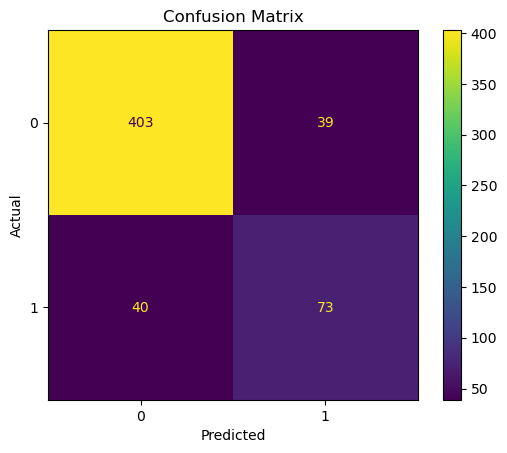

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(pca_train,y_train) # entrainement des donneés
y_pred = clf.predict(pca_test) # on applique la prediction


plot_confusion_matrix(clf,pca_test,y_test)
matrix = confusion_matrix(y_test,y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

map_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(list(map_characters.values()))    

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

On remarque de cette matrice de confusion qu'on a trés haut taux de faux negatifs, ce qui explique que le modéle à bien fonctionné, il reste inférieur à celui du modéle SVM

# Random forest

Accuracy:  91.8918918918919 %


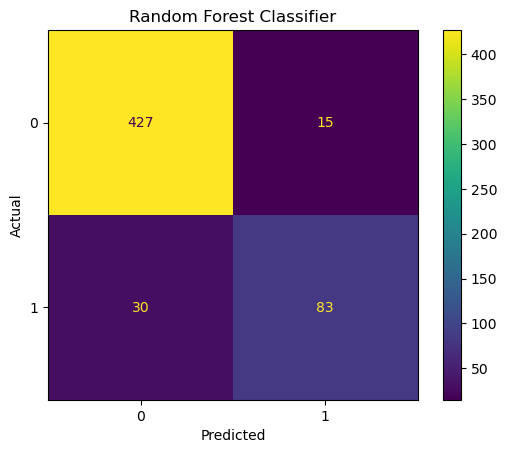

In [40]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth=10, random_state=10)
clf.fit(pca_train,y_train) # entrainement des donneés
y_pred = clf.predict(pca_test) # on applique la prediction

# affichage de la matrice de confusion
matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(clf,pca_test,y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier")

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%")

On remarque de cette matrice de confusion qu'on a trés haut taux de faux negatifs, ce qui explique que le modéle à bien fonctionné, les resultats sont trés proche de ceux obtenus suivant SVM 

Accuracy:  88.64864864864866 %


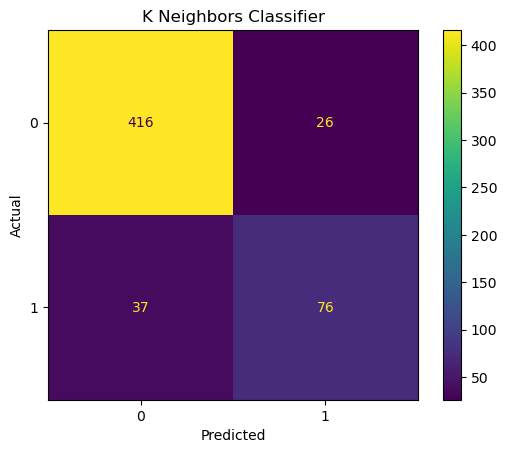

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # on a choisis 3 voisins
clf.fit(pca_train, y_train) # entrainement des donneés dans le cas d'un apprentissage supervisé, donc on applique sur deux arrays pca_train et y_train
y_pred = clf.predict(pca_test) # on applique la prediction

# affichage de la matrice de confusion
matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(clf,pca_test,y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K Neighbors Classifier")

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100,"%") # en pourcentage

Les resultats obtenus sont acceptables, néamoins ce n'est pas le modéle qu'on favorise le plus puisque SVM suivi de Forêts Aléatoires sont bien meilleurs

La cellule ci-dessous confirme l'efficacité de l'algorithme utilisé, en réappliquant l'algorithme d'une autre maniére

In [ ]:
from sklearn import svm
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
param_grid = {'C': [0.1, 1 ,10 , 100], 'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf', 'poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)
model.fit(pca_train, y_train)
print("Training Score:", model.score(pca_train, y_train))
print("Testing Score:",model.score(pca_test, y_test))

### Lecture du x_train pour essayer de convertire ces values en np array

In [126]:

df1 = pd.read_csv("./data/cancer/x_train.csv")
df1

values
0     array([[[241, 240, 241],\n        [242, 240, 2...
1     array([[[187, 139, 202],\n        [183, 125, 1...
2     array([[[241, 240, 242],\n        [244, 240, 2...
3     array([[[213, 200, 219],\n        [241, 242, 2...
4     array([[[238, 223, 242],\n        [239, 235, 2...
...                                                 ...
1112  array([[[225, 206, 240],\n        [158, 105, 2...
1113  array([[[237, 237, 241],\n        [240, 233, 2...
1114  array([[[172, 120, 172],\n        [162, 110, 1...
1115  array([[[241, 239, 241],\n        [239, 240, 2...
1116  array([[[141,  72, 118],\n        [146,  78, 1...

[1117 rows x 1 columns]

In [132]:
df1.iloc[0].values.ndim


1

### Conversion des valeurs du csv x_train en np array 

In [130]:
# df11 = df1.apply(lambda x:  nA)
# d = df1.iloc[0].values
# #type(np.fromstring(d[0], dtype=int, sep=','))
# i_str = d[0].replace("array(","").replace(")","").replace(", dtype=uint8","")
# # print(i_str)
# xx = np.matrix(i_str).reshape(-1, 3).A
# df11
### La conversion est faite mais on a un tableau à deux dimension, ce pendant les tableaux de depart sont à 3 dimension 
for i, row in df1.iterrows():
     df1.iloc[i]["values"] = np.array(np.matrix(row.values[0].replace("array(","").replace(")","").replace(", dtype=uint8","")).reshape(-1, 3).A)
    
df1

values
0     [[241, 240, 241], [242, 240, 242], [242, 241, ...
1     [[187, 139, 202], [183, 125, 186], [176, 112, ...
2     [[241, 240, 242], [244, 240, 241], [242, 241, ...
3     [[213, 200, 219], [241, 242, 239], [240, 239, ...
4     [[238, 223, 242], [239, 235, 241], [250, 245, ...
...                                                 ...
1112  [[225, 206, 240], [158, 105, 216], [194, 153, ...
1113  [[237, 237, 241], [240, 233, 242], [240, 240, ...
1114  [[172, 120, 172], [162, 110, 166], [159, 103, ...
1115  [[241, 239, 241], [239, 240, 240], [239, 239, ...
1116  [[141, 72, 118], [146, 78, 120], [231, 210, 22...

[1117 rows x 1 columns]